### One-Vs-Rest

One-Vs-Rest（ovr）的思想是把一个多分类的问题变成多个二分类的问题

<b>这里需要注意的是ovr依然使用sigmoid函数的计算公式</b>

* 优点：普适性还比较广，可以应用于能输出值或者概率的分类器，同时效率相对较好，有多少个类别就训练多少个分类器。

* 缺点：很容易造成训练集样本数量的不平衡（Unbalance），尤其在类别较多的情况下，经常容易出现正类样本的数量远远不及负类样本的数量，这样就会造成分类器的偏向性。

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [12]:
X, y = datasets.load_iris(return_X_y=True)  # 150个样本， 3个类别
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)  # random_state=1024 随机打乱固定数据
display(X_train.shape, X_test.shape)
display(y_train.shape, y_test.shape)

(120, 4)

(30, 4)

(120,)

(30,)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### ovr建模

In [15]:
"""
multi_class : {'auto', 'ovr', 'multinomial'}
auto:默认的参数，根据数据来决定数二分类还是多分类
ovr:指定为多分类
multinomial:多项式
"""
# 准确率
from sklearn.metrics import accuracy_score
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
display(y_test[:10], y_pred[:10])
print('ovr的准确率为：', model.score(X_test, y_test))

array([1, 0, 2, 2, 0, 0, 1, 2, 1, 0])

array([1, 0, 2, 2, 0, 0, 1, 2, 1, 0])

ovr的准确率为： 1.0


In [49]:
accuracy_score(y_test, y_pred)

1.0

In [52]:
(y_test == y_pred).sum() / 30

1.0

#### 概率预测

In [55]:
y_pred[:10]

array([1, 0, 2, 2, 0, 0, 1, 2, 1, 0])

In [54]:
np.set_printoptions(suppress=True)
proba = model.predict_proba(X_test)  # 在使用predict_proba函数时，进行了归一化，所以后面进行手动计算时也需要对数据进行归一化
proba[:10]

array([[0.15343204, 0.83995038, 0.00661758],
       [0.81155421, 0.18843433, 0.00001146],
       [0.00001368, 0.31458264, 0.68540369],
       [0.00087407, 0.43021069, 0.56891524],
       [0.79198737, 0.2080071 , 0.00000553],
       [0.86110144, 0.13889478, 0.00000378],
       [0.00650175, 0.84071974, 0.1527785 ],
       [0.00019224, 0.19356487, 0.80624289],
       [0.01379238, 0.65811053, 0.32809708],
       [0.84337093, 0.15662392, 0.00000516]])

#### 概率手动计算

In [60]:
X.shape  # 150个样本  4个特征 花萼长，宽，花瓣 长宽

(150, 4)

In [61]:
# ovr依然使用sigmod函数
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

"""
有几个类别，就有几个分类器，分类器也就是线性方程
鸢尾花有三个类别 0,1,2 那么就会有3行  因为有四个特征，所以就会有4列
这里的每个方程有4个系数
"""
b = model.intercept_

# 方程系数  系数由属性决定
w = model.coef_  
display(w, b)

array([[-0.45418407,  0.77862646, -2.2268873 , -0.87662661],
       [-0.41614677, -1.98168225,  0.82180991, -1.2628189 ],
       [-0.28832573, -0.49869581,  2.70303022,  2.23465912]])

array([  6.82628324,   6.16028196, -13.72510278])

In [62]:
X_test.shape  # 一行4个数据 4列

(30, 4)

In [63]:
w.shape # 一列 有3个数据

(3, 4)

In [66]:
y = X_test.dot(w.T) + b  # 进行矩阵乘法时，进行行乘以列

In [74]:
p = sigmoid(y)
p = p / p.sum(axis=1).reshape(-1, 1) # 归一化
p[:10]

array([[0.15343204, 0.83995038, 0.00661758],
       [0.81155421, 0.18843433, 0.00001146],
       [0.00001368, 0.31458264, 0.68540369],
       [0.00087407, 0.43021069, 0.56891524],
       [0.79198737, 0.2080071 , 0.00000553],
       [0.86110144, 0.13889478, 0.00000378],
       [0.00650175, 0.84071974, 0.1527785 ],
       [0.00019224, 0.19356487, 0.80624289],
       [0.01379238, 0.65811053, 0.32809708],
       [0.84337093, 0.15662392, 0.00000516]])

### Softmax

将数据变为概率，数据越大，概率就越大

计算公式： $y = e^x / \sum\limits_{j = 1}^ke^x$

In [77]:
def softmax(z):
    return np.exp(z) / np.exp(z).sum()

z = [3, 1, -3]
softmax(z)

array([0.87887824, 0.11894324, 0.00217852])

In [78]:
import numpy as np 
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [82]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)
display(X_train.shape, X_test.shape)
display(y_train.shape, y_test.shape)

(120, 4)

(30, 4)

(120,)

(30,)

In [83]:
X.shape

(150, 4)

In [84]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 模型训练和预测

In [88]:
model = LogisticRegression(multi_class='multinomial')  # 使用softmax
model.fit(X_train, y_train)
y_pred = model.score(X_test, y_test)
print('softmax预测的准确率为：', y_pred)
print('softmax预测测试数据的准确率为：\n', model.predict_proba(X_test)[:5])

softmax预测的准确率为： 1.0
softmax预测测试数据的准确率为：
 [[0.1530188  0.84270328 0.00427793]
 [0.94519984 0.05479963 0.00000053]
 [0.00000014 0.00672261 0.99327725]
 [0.00040995 0.16393254 0.83565752]
 [0.96771734 0.0322825  0.00000016]]


e:\envs\jupy_env\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 概率手动计算

In [89]:
w = model.coef_
b = model.intercept_

In [95]:
def sofmax(z):
    return np.exp(z) / np.exp(z).sum(axis=1).reshape(-1, 1)

y = X_test.dot(w.T) + b
sofmax(y)[:5]

array([[0.1530188 , 0.84270328, 0.00427793],
       [0.94519984, 0.05479963, 0.00000053],
       [0.00000014, 0.00672261, 0.99327725],
       [0.00040995, 0.16393254, 0.83565752],
       [0.96771734, 0.0322825 , 0.00000016]])

## softmax实现手写数字分类 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

### 加载数据

In [4]:
data = pd.read_csv('digits.csv')
X = data.drop('label', axis=1)
y = data['label']
display(X.shape, y.shape)

(42000, 784)

(42000,)

### 划分训练集和测试集

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784)

(8400, 784)

(33600,)

(8400,)

### 训练模型

In [96]:
model = LogisticRegression(multi_class='multinomial', max_iter=100, solver='sag')
model.fit(X_train, y_train)

e:\envs\jupy_env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(multi_class='multinomial', solver='sag')

In [101]:
y_pred = model.predict(X_test)

In [102]:
# np.set_printoptions(suppress=True)
print('概率为：\n', model.predict_proba(X_test)[:5])
print('准确率：', model.score(X_test, y_test))

概率为：
 [[0.         0.00000288 0.99986224 0.00009269 0.         0.00000203
  0.00000657 0.         0.00003359 0.        ]
 [0.00000001 0.         0.00041588 0.9995087  0.         0.0000457
  0.         0.00000003 0.00002878 0.0000009 ]
 [0.         0.00000002 0.00000003 0.0000003  0.00480793 0.00000015
  0.         0.00000053 0.00003682 0.99515421]
 [0.000003   0.0000298  0.00000278 0.00001352 0.99757672 0.00000132
  0.00003778 0.00005927 0.00015842 0.0021174 ]
 [0.00000655 0.00000108 0.0067361  0.00106266 0.00000002 0.0006547
  0.00004334 0.         0.9914699  0.00002565]]
准确率： 0.9108333333333334


In [103]:
w = model.coef_ # 10个方程， 784个系数 10个截距

In [104]:
b = model.intercept_

#### 手动实现概率的计算

In [105]:
X_test.shape

(8400, 784)

In [106]:
w.shape

(10, 784)

In [107]:
z = X_test.dot(w.T) + b

In [108]:
np.set_printoptions(suppress=True)

In [109]:
# np.set_printoptions(suppress=True)
def softmax(z):
    return np.exp(z) / np.exp(z).sum(axis=1)
p = softmax(z)
p[:5]

,0,1,2,3,4,5,6,7,8,9,...,41952,41958,41960,41968,41970,41971,41979,41984,41987,41988
2095,3.645032e-10,NaN,NaN,22.816679,NaN,NaN,9.555003e-06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25638,9.386617e-07,NaN,NaN,208010.935280,NaN,NaN,8.682870e-14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8536,2.063641e-13,NaN,NaN,0.005548,NaN,NaN,4.043477e-10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17623,1.621559e-07,NaN,NaN,0.001548,NaN,NaN,2.557933e-08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21475,1.651919e-06,NaN,NaN,0.566725,NaN,NaN,1.366399e-07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test, y_pred)

0.9108333333333334

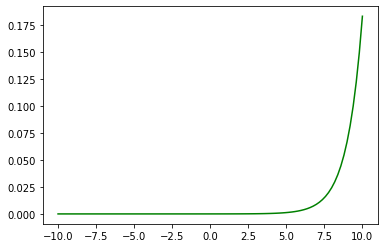

In [10]:
import numpy as np 
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 100)
def softmax(z):
    return np.exp(z) / np.exp(-z).sum()
y = softmax(X)
plt.plot(X, y, color='g')